# Dataset Explanation:

The dataset contains information related to bike sharing. Here's a brief explanation of each column:

datetime: The timestamp of the observation.

season: The season when the observation was made (1: spring, 2: summer, 3: fall, 4: winter).

holiday: Whether the day is a holiday (0: no, 1: yes).

workingday: Whether the day is a working day (0: no, 1: yes).

weather: The weather condition (1: clear, 2: mist, 3: light rain/snow, 4: heavy rain/snow).

temp: The temperature in Celsius.

atemp: The "feels-like" temperature in Celsius.

humidity: The relative humidity.

windspeed: The wind speed.

casual: The number of casual users (non-registered users).

registered: The number of registered users.

count: The total count of rentals (target variable: casual + registered).

In [1]:
import pandas as pd

file_path = 'yulu_bike_sharing_dataset.csv'
df = pd.read_csv(file_path)

print(df.head())


              datetime  season  holiday  workingday  weather  temp   atemp  \
0  2011-01-01 00:00:00       1        0           0        1  9.84  14.395   
1  2011-01-01 01:00:00       1        0           0        1  9.02  13.635   
2  2011-01-01 02:00:00       1        0           0        1  9.02  13.635   
3  2011-01-01 03:00:00       1        0           0        1  9.84  14.395   
4  2011-01-01 04:00:00       1        0           0        1  9.84  14.395   

   humidity  windspeed  casual  registered  count  
0        81        0.0       3          13     16  
1        80        0.0       8          32     40  
2        80        0.0       5          27     32  
3        75        0.0       3          10     13  
4        75        0.0       0           1      1  


In [2]:
import pandas as pd
# Convert 'datetime' column to datetime format
df['datetime'] = pd.to_datetime(df['datetime'])

# Extract relevant features from 'datetime'
df['hour'] = df['datetime'].dt.hour
df['day'] = df['datetime'].dt.day
df['month'] = df['datetime'].dt.month
df['year'] = df['datetime'].dt.year

# Define the features and the target
X = df.drop(['count', 'casual', 'registered', 'datetime'], axis=1)
y = df['count']


## Selecting the best regression model

In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import r2_score, mean_squared_error
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Dictionary to store algorithm names and their R² scores
algorithm_scores = {}

# List of regression algorithms to try
algorithms = [
    LinearRegression(),
    DecisionTreeRegressor(random_state=0),
    RandomForestRegressor(random_state=0),
    GradientBoostingRegressor(random_state=0),
    KNeighborsRegressor(n_neighbors=5)
]

# Train and evaluate each algorithm
for algorithm in algorithms:
    model = algorithm
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    r2 = r2_score(y_test, y_pred)
    algorithm_scores[type(model).__name__] = r2

# Find the algorithm with the best R² score
best_algorithm = max(algorithm_scores, key=algorithm_scores.get)
best_score = algorithm_scores[best_algorithm]

print(f"Best Algorithm: {best_algorithm}")
print(f"Best R² Score: {best_score:.4f}")


Best Algorithm: RandomForestRegressor
Best R² Score: 0.9402


## Grid search on Random Forest Regression Model

In [4]:
# The random forest is the best model.
# Perform a grid search over the most important hyperparameters in order to tune the model.

from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score


# Define the features and target
X = df.drop(['count', 'casual', 'registered', 'datetime'], axis=1)
y = df['count']

# Reduce data to a subset
X_sample, _, y_sample, _ = train_test_split(X, y, test_size=0.1, random_state=0)

def tune_random_forest(X, y):
    # Define a parameter grid
    param_grid = {
        'n_estimators': [50, 100],
        'max_depth': [5, 10],
        'min_samples_split': [2, 5],
        'min_samples_leaf': [1, 2]
    }

    # Create a Random Forest model
    model = RandomForestRegressor(random_state=0)

    # Create GridSearchCV object
    grid_search = GridSearchCV(model, param_grid, cv=5, scoring='r2')

    # Fit the grid search to the data
    grid_search.fit(X, y)

    # Get the best estimator
    best_model = grid_search.best_estimator_

    # Print best hyperparameters and R² score
    print("Best Parameters:", grid_search.best_params_)
    print("Best R² Score:", grid_search.best_score_)

    # Generate predictions
    y_pred = best_model.predict(X)

    # Calculate R² on the full dataset
    r2 = r2_score(y, y_pred)
    print(f"R² Score on Full Data: {r2:.2f}")

# Call the function
tune_random_forest(X_sample, y_sample)


Best Parameters: {'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 100}
Best R² Score: 0.9238648639531822
R² Score on Full Data: 0.95


## Plotting the results

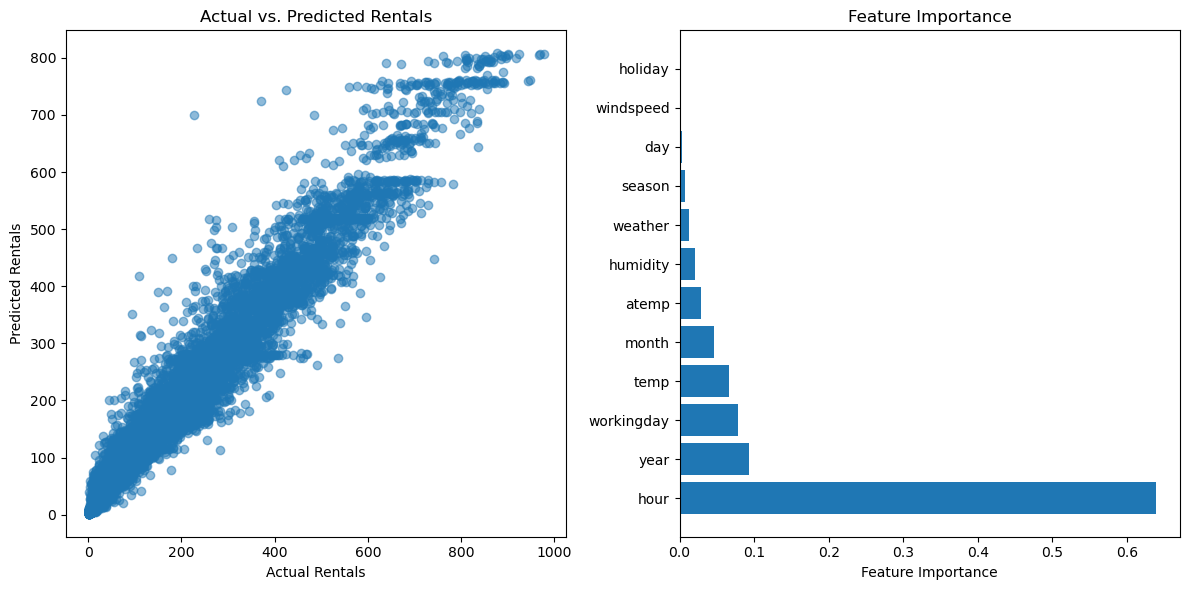

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
import numpy as np

# Load the dataset
df = pd.read_csv('yulu_bike_sharing_dataset.csv')

# Preprocess the datetime column
df['datetime'] = pd.to_datetime(df['datetime'])
df['hour'] = df['datetime'].dt.hour
df['day'] = df['datetime'].dt.day
df['month'] = df['datetime'].dt.month
df['year'] = df['datetime'].dt.year

# Define the features and target
X = df.drop(['count', 'casual', 'registered', 'datetime'], axis=1)
y = df['count']

# Best parameters
best_params = {
    'max_depth': 10,
    'min_samples_leaf': 2,
    'min_samples_split': 2,
    'n_estimators': 100
}

# Create a Random Forest model with best parameters
model = RandomForestRegressor(**best_params, random_state=0)
model.fit(X, y)

# Generate predictions
y_pred = model.predict(X)

# Create plots to visually inspect the results
plt.figure(figsize=(12, 6))

# Plot actual vs. predicted values
plt.subplot(1, 2, 1)
plt.scatter(y, y_pred, alpha=0.5)
plt.xlabel("Actual Rentals")
plt.ylabel("Predicted Rentals")
plt.title("Actual vs. Predicted Rentals")

# Plot feature importances
plt.subplot(1, 2, 2)
importances = model.feature_importances_
indices = np.argsort(importances)[::-1]
feature_names = X.columns
plt.barh(range(X.shape[1]), importances[indices], align="center")
plt.yticks(range(X.shape[1]), [feature_names[i] for i in indices])
plt.xlabel("Feature Importance")
plt.title("Feature Importance")

plt.tight_layout()
plt.show()

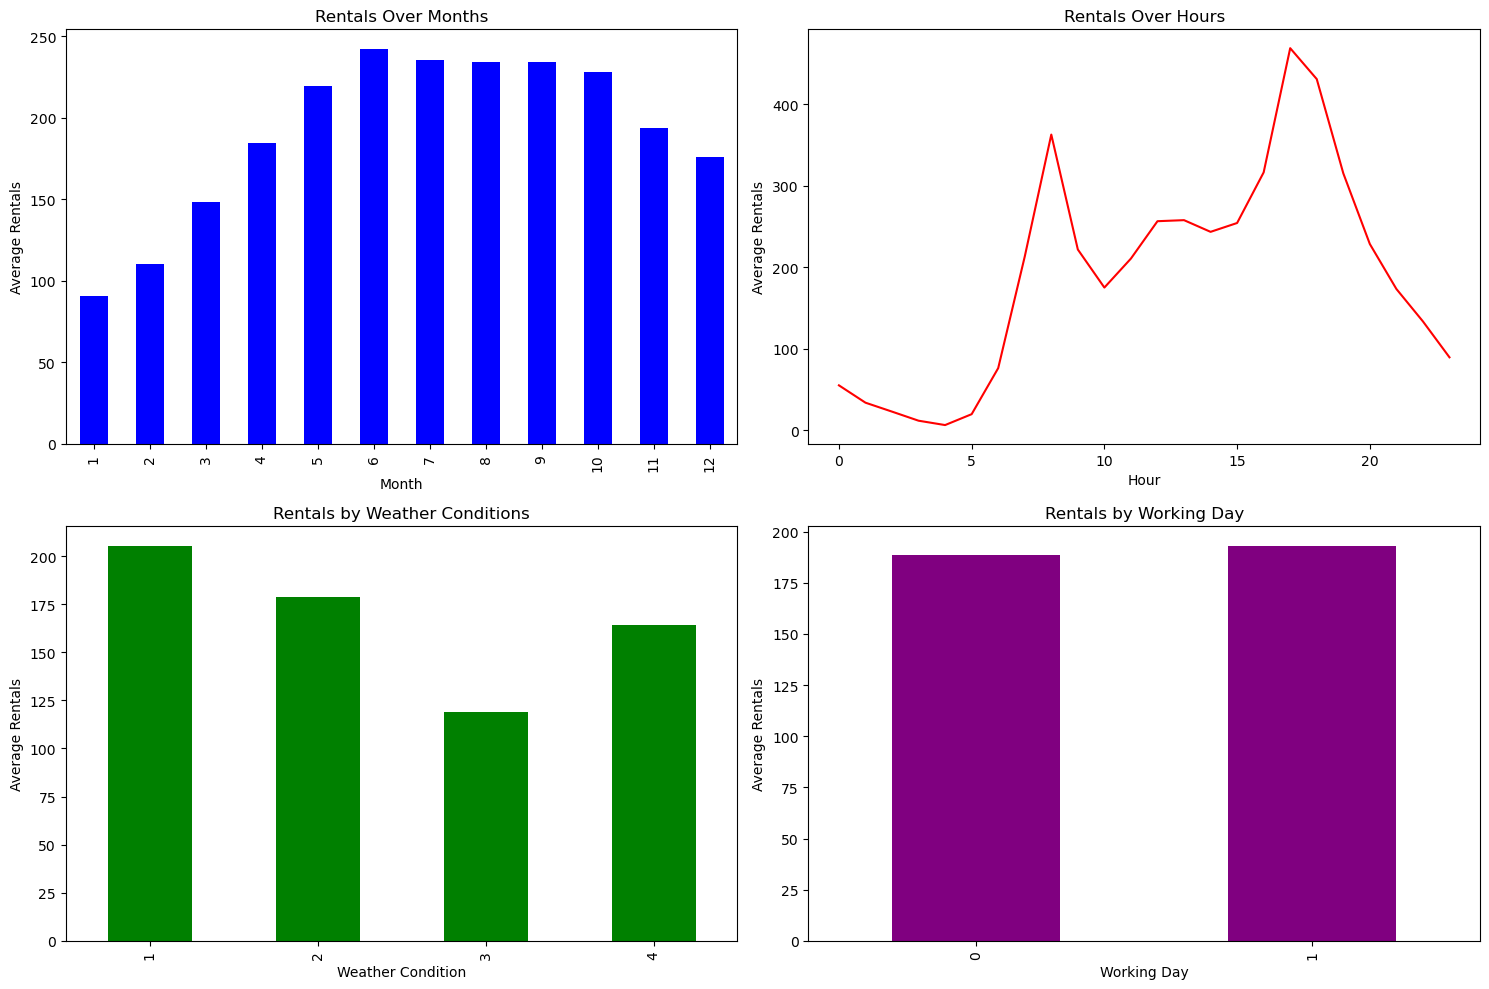

In [6]:
# Create subplots for indepth analysis
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15, 10))

# Plot 1: Rentals over Months
df.groupby('month')['count'].mean().plot(ax=axes[0, 0], kind='bar', color='b')
axes[0, 0].set_title('Rentals Over Months')
axes[0, 0].set_xlabel('Month')
axes[0, 0].set_ylabel('Average Rentals')

# Plot 2: Rentals over Hours
df.groupby('hour')['count'].mean().plot(ax=axes[0, 1], kind='line', color='r')
axes[0, 1].set_title('Rentals Over Hours')
axes[0, 1].set_xlabel('Hour')
axes[0, 1].set_ylabel('Average Rentals')

# Plot 3: Rentals by Weather Conditions
df.groupby('weather')['count'].mean().plot(ax=axes[1, 0], kind='bar', color='g')
axes[1, 0].set_title('Rentals by Weather Conditions')
axes[1, 0].set_xlabel('Weather Condition')
axes[1, 0].set_ylabel('Average Rentals')

# Plot 4: Rentals by Working Day
df.groupby('workingday')['count'].mean().plot(ax=axes[1, 1], kind='bar', color='purple')
axes[1, 1].set_title('Rentals by Working Day')
axes[1, 1].set_xlabel('Working Day')
axes[1, 1].set_ylabel('Average Rentals')

plt.tight_layout()
plt.show()

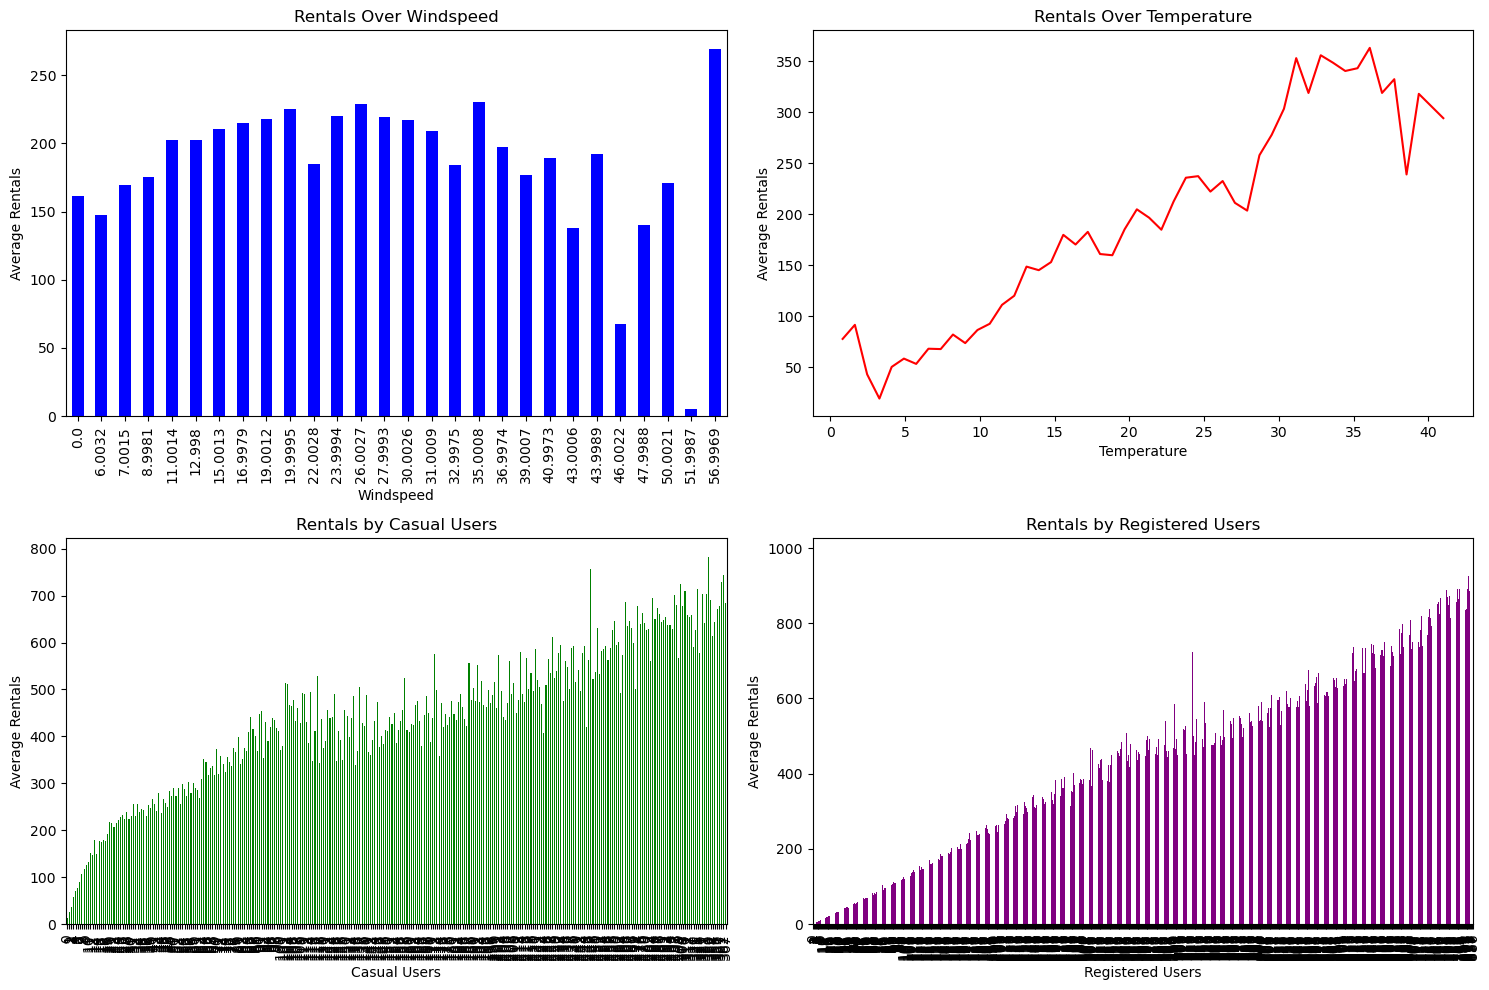

In [7]:
# Create subplots for indepth analysis
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15, 10))

# Plot 1: Rentals over Windspeed
df.groupby('windspeed')['count'].mean().plot(ax=axes[0, 0], kind='bar', color='b')
axes[0, 0].set_title('Rentals Over Windspeed')
axes[0, 0].set_xlabel('Windspeed')
axes[0, 0].set_ylabel('Average Rentals')

# Plot 2: Rentals over Temperature
df.groupby('temp')['count'].mean().plot(ax=axes[0, 1], kind='line', color='r')
axes[0, 1].set_title('Rentals Over Temperature')
axes[0, 1].set_xlabel('Temperature')
axes[0, 1].set_ylabel('Average Rentals')

# Plot 3: Rentals by Casual Users
df.groupby('casual')['count'].mean().plot(ax=axes[1, 0], kind='bar', color='g')
axes[1, 0].set_title('Rentals by Casual Users')
axes[1, 0].set_xlabel('Casual Users')
axes[1, 0].set_ylabel('Average Rentals')

# Plot 4: Rentals by Registered Users
df.groupby('registered')['count'].mean().plot(ax=axes[1, 1], kind='bar', color='purple')
axes[1, 1].set_title('Rentals by Registered Users')
axes[1, 1].set_xlabel('Registered Users')
axes[1, 1].set_ylabel('Average Rentals')

plt.tight_layout()
plt.show()

## End